In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
"""Length of the dataset is 68 because the batch is defined of 32, so 68*32 = 2176
that means there are total 2176 images, which is true"""

'Length of the dataset is 68 because the batch is defined of 32, so 68*32 = 2176\nthat means there are total 2176 images, which is true'

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1]


"""32 is the batch size
256,256 is the image size
3 is nothing but the RGB channels that is red green blue 

and 
0 : 'Potato___Early_blight', 
1 : 'Potato___late_blight',
2 : 'Potato___healthy'"""

In [12]:
#For printing the image 
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

#This will print the output in the tensor format

tf.Tensor(
[[[115. 103. 115.]
  [134. 122. 134.]
  [110.  98. 110.]
  ...
  [111. 101. 110.]
  [126. 116. 125.]
  [107.  97. 106.]]

 [[110.  98. 110.]
  [122. 110. 122.]
  [102.  90. 102.]
  ...
  [123. 113. 122.]
  [136. 126. 135.]
  [101.  91. 100.]]

 [[120. 108. 120.]
  [122. 110. 122.]
  [109.  97. 109.]
  ...
  [126. 116. 125.]
  [141. 131. 140.]
  [112. 102. 111.]]

 ...

 [[178. 175. 186.]
  [181. 178. 189.]
  [181. 178. 189.]
  ...
  [180. 174. 184.]
  [180. 174. 184.]
  [177. 171. 181.]]

 [[180. 177. 188.]
  [184. 181. 192.]
  [183. 180. 191.]
  ...
  [181. 175. 185.]
  [181. 175. 185.]
  [177. 171. 181.]]

 [[181. 178. 189.]
  [186. 183. 194.]
  [184. 181. 192.]
  ...
  [179. 173. 183.]
  [179. 173. 183.]
  [174. 168. 178.]]], shape=(256, 256, 3), dtype=float32)


In [13]:
#for  converting the same output in the numpy 
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[150. 135. 142.]
  [137. 122. 129.]
  [157. 142. 149.]
  ...
  [164. 149. 156.]
  [169. 154. 161.]
  [174. 159. 166.]]

 [[123. 108. 115.]
  [147. 132. 139.]
  [189. 174. 181.]
  ...
  [165. 150. 157.]
  [168. 153. 160.]
  [171. 156. 163.]]

 [[182. 167. 174.]
  [135. 120. 127.]
  [144. 129. 136.]
  ...
  [166. 151. 158.]
  [166. 151. 158.]
  [168. 153. 160.]]

 ...

 [[180. 169. 177.]
  [212. 201. 209.]
  [192. 181. 189.]
  ...
  [186. 176. 184.]
  [183. 173. 181.]
  [182. 172. 180.]]

 [[180. 169. 177.]
  [207. 196. 204.]
  [193. 182. 190.]
  ...
  [188. 178. 186.]
  [185. 175. 183.]
  [183. 173. 181.]]

 [[170. 159. 167.]
  [233. 222. 230.]
  [180. 169. 177.]
  ...
  [193. 183. 191.]
  [190. 180. 188.]
  [190. 180. 188.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


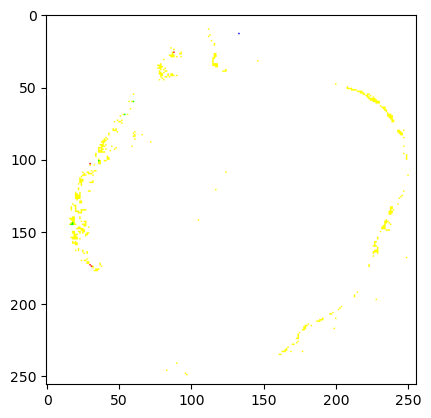

In [15]:
#To see the actual image 
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())

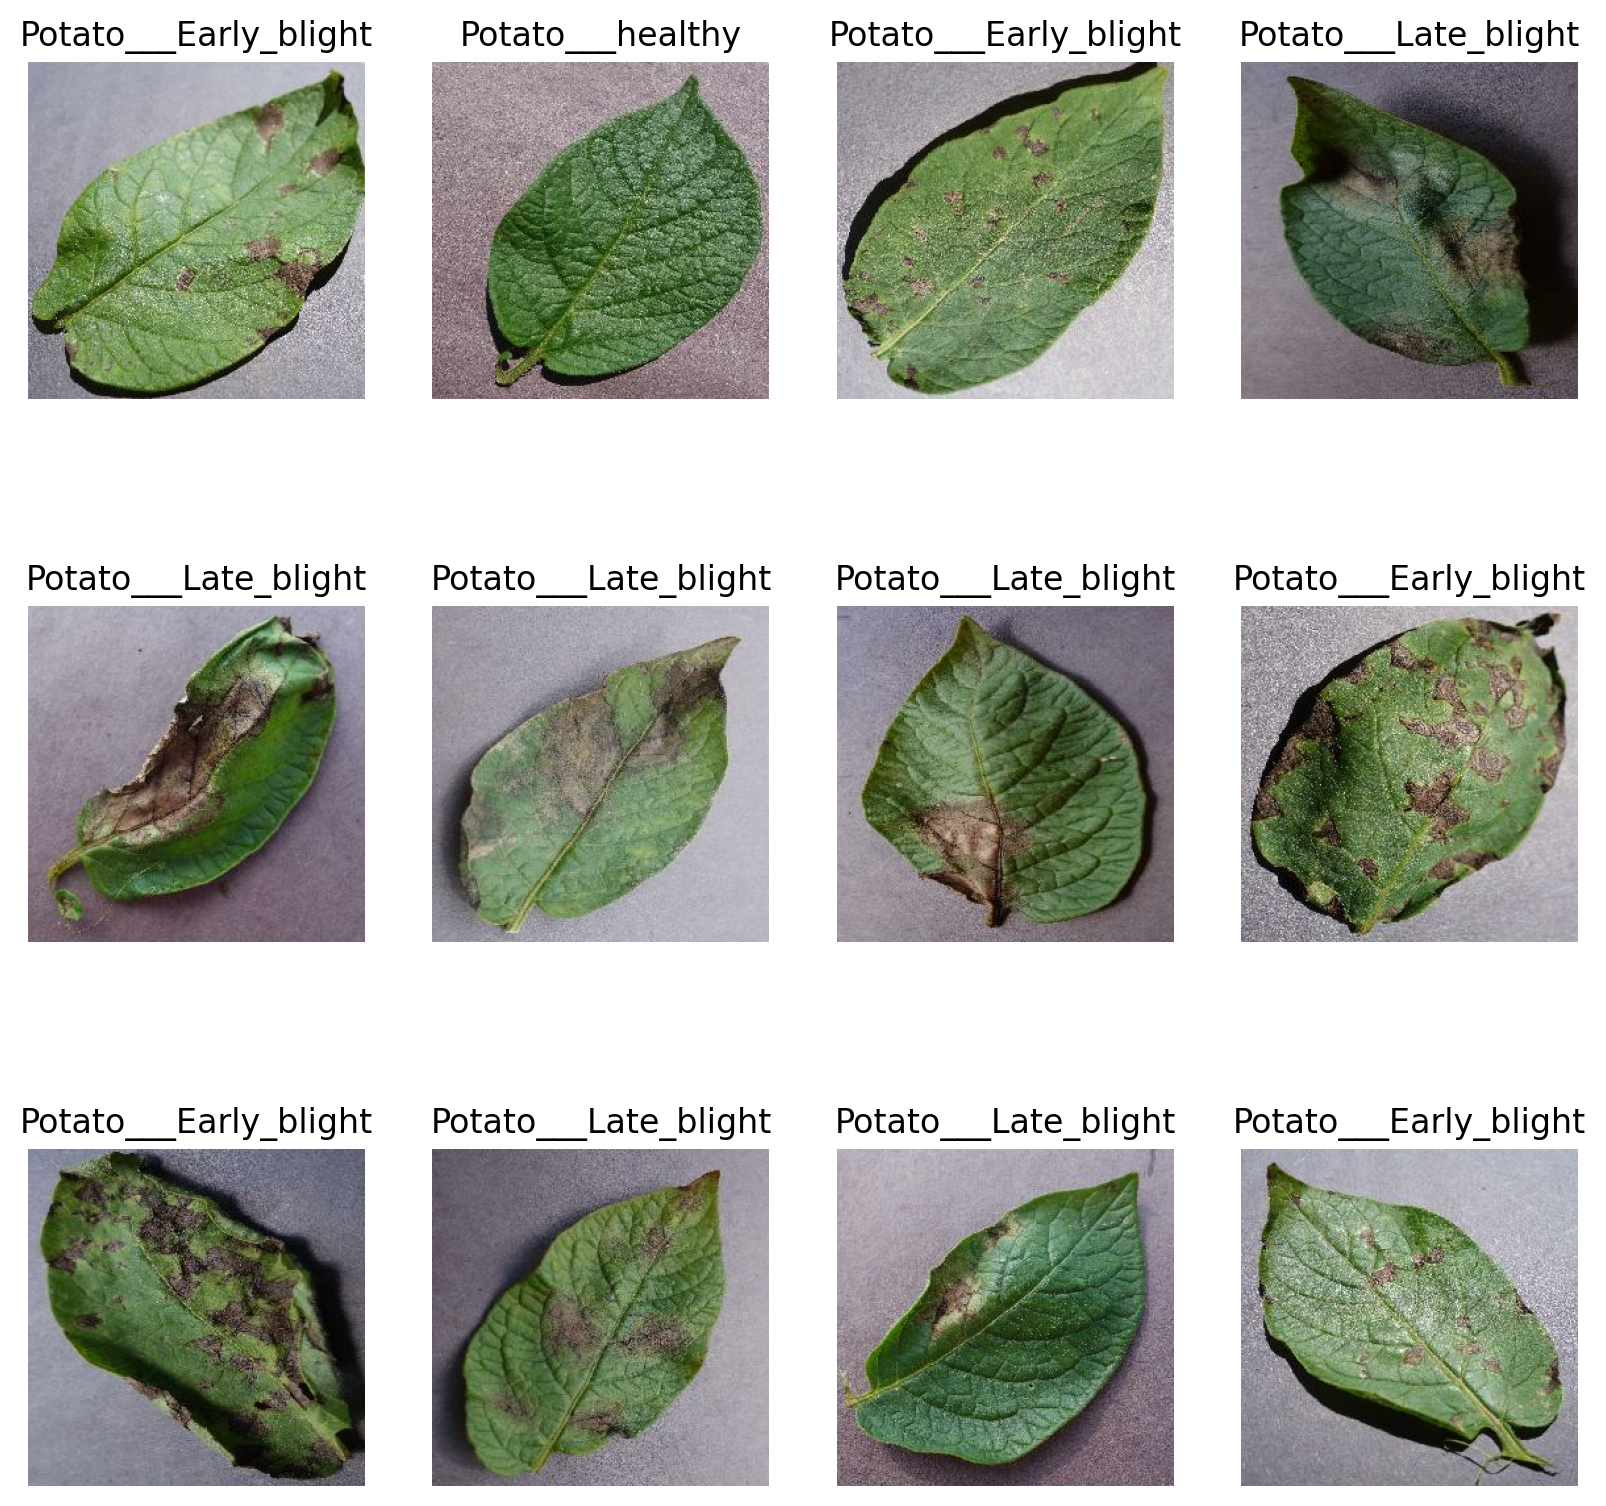

In [27]:
#To see the actual image 
plt.figure(figsize=(10,10), dpi = 200)
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")